In [38]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from plotly.subplots import make_subplots
import json

#Time 00:01

In [48]:
#Read in dataset
df = pd.read_excel('pone.0212445.s004.xlsx',header=1)
df

#Time 00:01 

District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.255934   

     Prevalence_UCL  NoPLHIV  NoPLHIV_LCL  NoPLHIV_UCL  
0         16.932000   102437        77340       127534  
1         16.421802   101693        83092       123691  
2          7.356000   200751       117517       283985  
3          8.303091   232409       167359       320548  
4          5.444000    11302            0        22789  
..              ...      ...          ...          ...  
99        12.325536   101520        74646       136792  
100       13.200000    97459        39923       154995  
101       13.179704   106313        71964       154757  
102       16.012000   361450       228239       494661  
103       14.574909   340593       255052       450265  

[104 rows x 9 columns]

## Question 2

### Question 2a

In [3]:
total_survey_hiv = df[df['Estimate'] == 'Survey']['NoPLHIV'].sum()
print('Total HIV positive people in listed districts by Survey estimate:',total_survey_hiv)

#Time 00:01

Total HIV positive people in listed districts by Survey estimate: 6409903


### Question 2b

In [4]:
xhariep_average = df[df['District'] == 'Xhariep']['NoPLHIV'].mean()
print('Average NoPLHIV of the two estimates used for “Xhariep”:',xhariep_average)

#Time 00:01 

Average NoPLHIV of the two estimates used for “Xhariep”: 12247.5


### Question 2c

In [50]:
# Calculate the number of people not living with HIV. Divide the number of people leaving with HIV by the prevalence %.
df['NoPeopleNotHIV'] = ((df['NoPLHIV'] / df['Prevalence_%']) * 100) - df['NoPLHIV']
df['NoPeopleNotHIV'] = df['NoPeopleNotHIV'].astype(int)
df
#Time 00:02 

District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.255934   

     Prevalence_UCL  NoPLHIV  NoPLHIV_LCL  NoPLHIV_UCL  NoPeopleNotHIV  
0         16.932000   102437        77340       127534          650776  
1         16.421802   101693        83092       123691          651516  
2          7.356000   200751       117517       283985         3659845  
3          8.303091   232409       167359       320548         3628178  
4          5.444000    11302            0        22789          407290  
..              ...      ...          ...          ...             ...  
99        12.325536   101520        74646       136792         1008300  
100       13.200000    97459        39923       154995         1076745  
101       13.179704   106313        71964       154757         1067889  
102       16.012000   361450       228239       494661         2727866  
103       14.574909   340593       255052       450265         2748725  

[104 rows x 10 columns]

### Question 2d

In [51]:
filtered_df = df[df['District'].str.contains('city|metro', case=False)]
total_NoPLHIV_cities_survey = filtered_df[filtered_df['Estimate'] == 'Survey']['NoPLHIV'].sum()
total_NoPLHIV_cities_fay = filtered_df[filtered_df['Estimate'] == 'Fay-Heriott']['NoPLHIV'].sum()

print('Total HIV positive people in all cities (city|metro) by Survey estimate:',total_NoPLHIV_cities_survey)
print('Total HIV positive people in all cities (city|metro) by Fay-Heriott estimate:',total_NoPLHIV_cities_fay)

#Time 00:04

Total HIV positive people in all cities (city|metro) by Survey estimate: 1277484
Total HIV positive people in all cities (city|metro) by Fay-Heriott estimate: 1295249


### Question 3

In [52]:
new_col_names = [re.sub('[^A-Za-z]', '', col) for col in df.columns]
df.columns = new_col_names
print(df.columns)

#Time 00:04

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL',
       'NoPeopleNotHIV'],
      dtype='object')


### Question 4

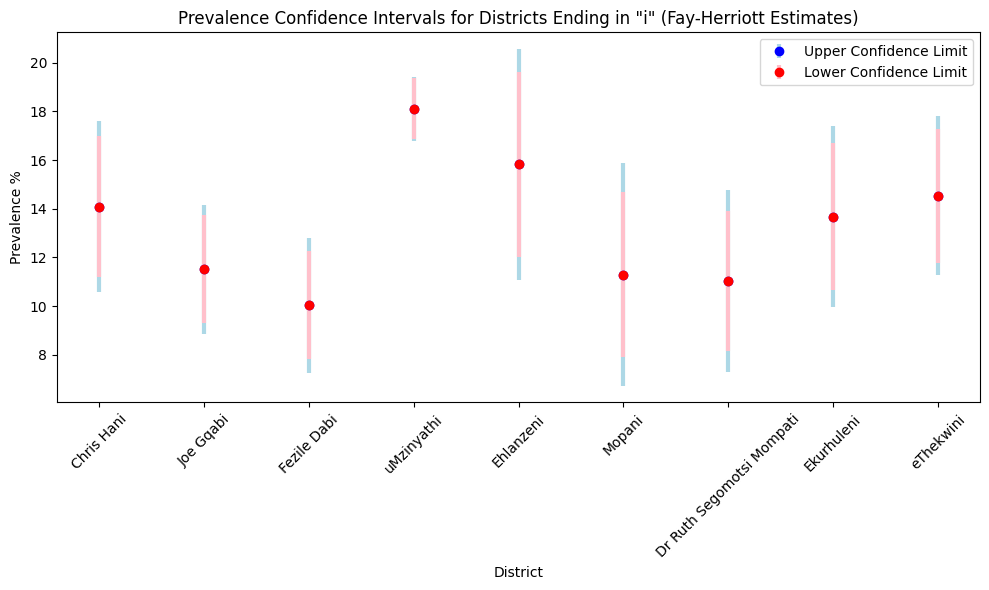

In [54]:
# Filter for districts ending in 'i' and Fay-Herriott estimates
filtered_df = df[(df['District'].str.endswith('i')) & (df['Estimate'] == 'Fay-Heriott')]

# Set the district name as the index
filtered_df.set_index('District', inplace=True)

plt.figure(figsize=(10, 6))

# Plotting the upper confidence limit
plt.errorbar(filtered_df.index, filtered_df['Prevalence'], 
             yerr=(filtered_df['PrevalenceUCL'] - filtered_df['Prevalence']), 
             fmt='o', label='Upper Confidence Limit', color='blue', ecolor='lightblue', elinewidth=3, capsize=0)

# Plotting the lower confidence limit
plt.errorbar(filtered_df.index, filtered_df['Prevalence'], 
             yerr=(filtered_df['Prevalence'] - filtered_df['PrevalenceLCL']), 
             fmt='o', label='Lower Confidence Limit', color='red', ecolor='pink', elinewidth=3, capsize=0)

# Customising the labels and title
plt.xlabel('District')
plt.ylabel('Prevalence %')
plt.title('Prevalence Confidence Intervals for Districts Ending in "i" (Fay-Herriott Estimates)')
plt.xticks(rotation=45)  
plt.legend()

# Use tight_layout() to adjust positions of axes and then showing the plot
plt.tight_layout()
plt.show()

#Time 00:11

## Further Analysis

### Choropleth Maps

In [55]:
#Topojson file containing the polygons that outline the administrative districts of South Africa
topojson_path = 'za-districts.topojson' 

#Loading the topojson file into a python dict
with open(topojson_path, 'r') as file:
    za_districts = json.load(file)

#Convert the TopoJSON to a GeoDataFrame
gdf = gpd.read_file(topojson_path, layer='layer1')

#List that contains the choropleth maps
plots = []

for i, estimate_type in enumerate(list(df['Estimate'].unique())):

    #Getting HIV data based on estimate type
    hiv_estimate_data = df[df['Estimate'] == estimate_type]

    #Merge the HIV dataset with the GeoDataFrame
    merged_data = gdf.merge(hiv_estimate_data, left_on='DISTRICT', right_on='Code')

    fig = px.choropleth_mapbox(merged_data, 
                            geojson=merged_data.__geo_interface__, 
                            locations='Code', 
                            featureidkey="properties.DISTRICT",
                            color='Prevalence',
                            color_continuous_scale="Inferno",
                            range_color=(0, df['Prevalence'].max()),
                            mapbox_style="carto-darkmatter",
                            zoom=4.5, 
                            center = {"lat": -28, "lon": 26.1},
                            opacity=0.65,
                            labels={'Prevalence':'HIV Prevalence (%)'},
                            hover_data=['MUNICNAME', 'Prevalence','PrevalenceLCL','PrevalenceUCL','NoPLHIV','NoPLHIVLCL','NoPLHIVUCL','NoPeopleNotHIV'])

    # Updating the layout
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(title=f'HIV Prevalence by District in South Africa ({estimate_type} Estimates)',
                    title_font_color='white',
                    title_x = 0.5,
                    margin={"r":0,"t":35,"l":0,"b":0},
                    width=1000,
                    height=600,
                    font_color='white',
                    paper_bgcolor='rgb(50,50,50)',
                    )

    fig.update_traces(
        hovertemplate="District name: <b>%{customdata[0]}</b><br>"
                    "Prevalence %: <b>%{customdata[1]:.2f}</b><br>"
                    "Prevalence LCL: <b>%{customdata[2]:.2f}</b><br>"
                    "Prevalence UCL: <b>%{customdata[3]:.2f}</b><br>"
                    "NoPLHIV: <b>%{customdata[4]}</b><br>"
                    "NoPLHIV LCL: <b>%{customdata[5]:}</b><br>"
                    "NoPLHIV UCL: <b>%{customdata[6]}</b><br>"
                    "NoPeopleNotHIV: <b>%{customdata[7]:}</b><br>")
    plots.append(fig)

#Time 00:23

#### HIV Prevalence Choropleth Map(Survey)

In [56]:
#Survey Estimates
plots[0]

#### HIV Prevalence Choropleth Map(Fay-Heriott)

In [57]:
#Fay-Heriott Estimates
plots[1]

#### Choropleth Map Insights
• When comparing Survey vs. Fay-Heriott choropleth maps, it appears that "Survey" estimates predict a much higher HIV prevalence in the Central Karoo District, than the Fay-Heriott estimate does.<br>
• On both the Survey and Fay-Heriott estimates there is a tendency for the HIV prevalence to increase as one moves east.

Time 00:01

### Basic Statistical Insights

In [58]:
survey_prev_desc = df[df['Estimate'] == 'Survey']['Prevalence'].describe()
fay_prev_desc = df[df['Estimate'] == 'Fay-Heriott']['Prevalence'].describe()

survey_fay_comparison = pd.concat([survey_prev_desc,fay_prev_desc],axis=1,keys=['Prevalence % (Survey Method)','Prevalence % (Fay-Heriott Method)'])
survey_fay_comparison['Difference'] = survey_fay_comparison['Prevalence % (Survey Method)'] - survey_fay_comparison['Prevalence % (Fay-Heriott Method)']
survey_fay_comparison

#Time 00:05

Prevalence % (Survey Method)  Prevalence % (Fay-Heriott Method)  \
count                     52.000000                          52.000000   
mean                      12.154808                          12.072803   
std                        5.485232                           4.468496   
min                        2.700000                           1.584032   
25%                        8.200000                           9.031312   
50%                       11.750000                          11.693206   
75%                       15.975000                          15.132333   
max                       25.000000                          20.384918   

       Difference  
count    0.000000  
mean     0.082005  
std      1.016736  
min      1.115968  
25%     -0.831312  
50%      0.056794  
75%      0.842667  
max      4.615082

#### Notable Insights

<b>Standard Deviation</b><br>
The Survey method shows a slightly higher standard deviation (5.49%) compared to the Fay-Heriott method (4.47%).<br>
This indicates more variability in the HIV prevalence rates estimated by the Survey method.<br>
It could suggest that the Survey method is more sensitive to differences across districts or has a wider range in its estimates.

<b>Range of Prevalence Rates</b><br>
The Survey method has a broader range (min 2.7%, max 25%) compared to the Fay-Heriott method (min 1.58%, max 20.38%).<br>
This wider range in the Survey data could point to it capturing more extreme values or having more diverse samples across districts.

<b>Quartile Distribution</b><br>
The 25th and 75th percentile values are somewhat close but not identical, suggesting that while the overall distribution is similar,<br>
there are differences in how the lower and upper quartiles are spread.

Time 00:07

In [59]:
#Comparing the differences in the estimate prevalance
survey_method = df[df['Estimate'] == 'Survey'].sort_values(by='Code').reset_index(drop=True)
fay_heriott_method = df[df['Estimate'] == 'Fay-Heriott'].sort_values(by='Code').reset_index(drop=True)

differences = survey_method['Prevalence'] - fay_heriott_method['Prevalence']
df2 = fay_heriott_method[['District','Code']].copy(deep=True)

df2['Differences'] = differences
df2['Absolute Differences'] = abs(differences)
df2.sort_values(by='Absolute Differences',ascending=False).head(5)

#Time 00:05

District  Code  Differences  Absolute Differences
41  Central Karoo   DC5    12.940107             12.940107
35       Sedibeng  DC42     4.512881              4.512881
40      West Rand  DC48    -4.093369              4.093369
9   Lejweleputswa  DC18     2.671714              2.671714
21         iLembe  DC29    -2.548202              2.548202

#### Top 5 Largest Absolute Estimate Differences in Prevalence
Above are the districts with the top 5 largest absolute estimate differences in prevalence.<br>
As one can see the largest difference in the estimates is for the Central Karoo.<br>
Which is also reflected in the choropleth maps.

Time 00:01

#### Total time: 01:07